In [1]:
import pyxdf
import numpy as np
import pyxdf
import mne
import numpy as np
import pandas as pd
# streams, header = pyxdf.load_xdf("sub-P001_ses-S001_task-Default_run-001_eeg.xdf")
streams, header = pyxdf.load_xdf("C:/Users/Toey/Desktop/data_ssvep/Toey/exp1/block_2.xdf")


In [2]:
raw_data = streams[0]["time_series"].T #From Steam variable this query is EEG data
channels =['Fz','Cz','P4','Pz','P3','P08','Oz','P07'] #Set your target EEG channel name
info = mne.create_info(
    ch_names= channels,
    ch_types= ['eeg']*len(channels),
    sfreq= 250 #OpenBCI Frequency acquistion
)
# Create MNE rawarray
raw_mne = mne.io.RawArray(raw_data, info, verbose=False)
print(raw_mne)

<RawArray | 8 x 229960 (919.8 s), ~14.0 MB, data loaded>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Toey\AppData\Local\Temp\ipykernel_30508\676745226.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_mne.plot_psd()
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


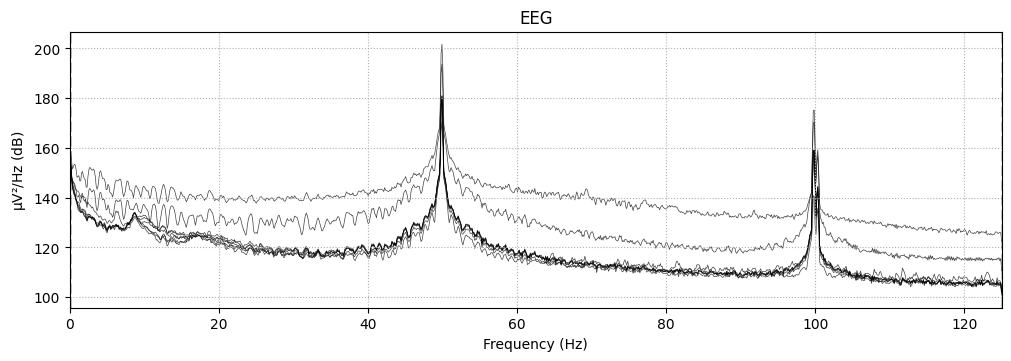

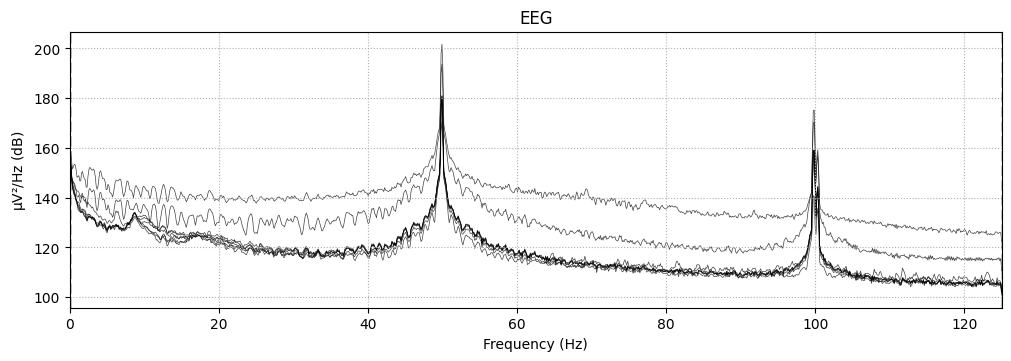

In [3]:
raw_mne.plot_psd()

In [4]:
low_freq = 6.0
high_freq = 16.0
raw_mne_filtered = raw_mne.copy().filter(l_freq=low_freq,h_freq=high_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 6 - 16 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 18.00 Hz)
- Filter length: 413 samples (1.652 s)



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Toey\AppData\Local\Temp\ipykernel_30508\1065521979.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_mne_filtered.plot_psd(fmin = 5, fmax = 20)
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


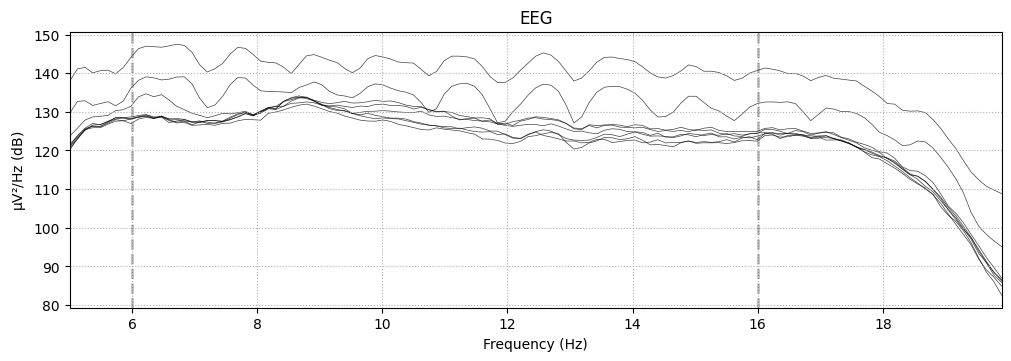

In [5]:
raw_mne_filtered.plot_psd(fmin = 5, fmax = 20)

In [5]:
# freqs = (50,100)
# meg_picks = mne.pick_types(raw_mne.info, meg=True)
# raw_notch = raw_mne.copy().notch_filter(freqs=freqs)
# # raw_notch = raw_mne.copy().notch_filter(freqs=freqs)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Toey\AppData\Local\Temp\ipykernel_8112\2590224343.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_notch.plot_psd()
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


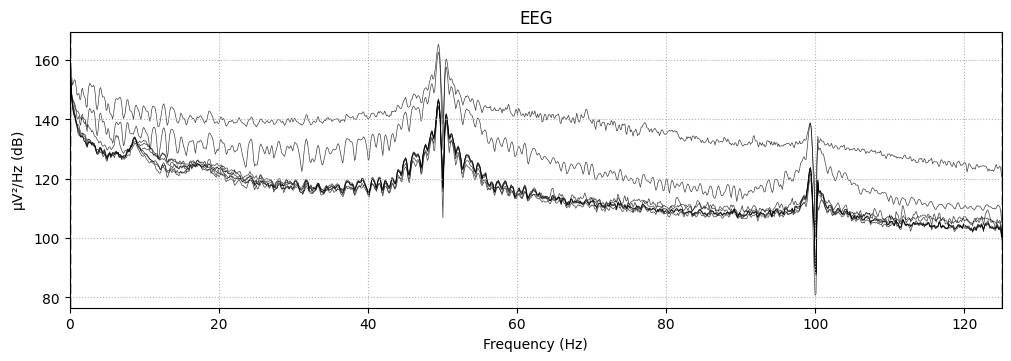

In [6]:
# raw_notch.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Toey\AppData\Local\Temp\ipykernel_8112\4082209830.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_notch_fit.plot_psd()
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


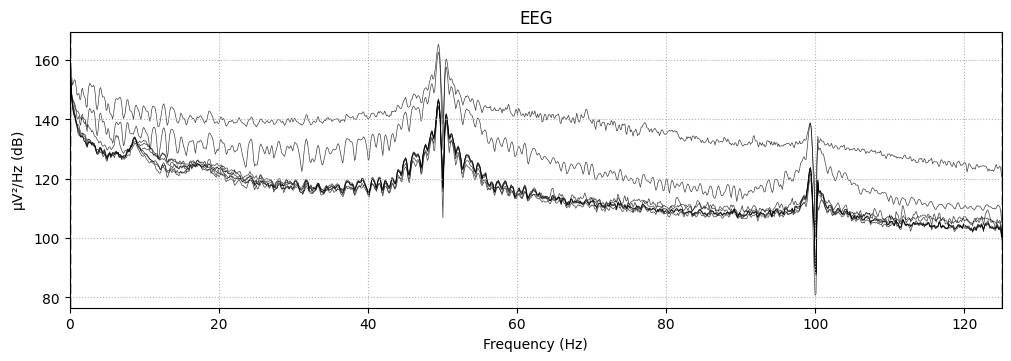

In [7]:
# raw_notch_fit = raw_mne.copy().notch_filter(freqs=freqs)
# raw_notch_fit.plot_psd()